In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import time

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy.stats import beta
import fig_settings as fs
import cmasher as cmr

from lcs import *

In [13]:
fs.set_colors()

In [14]:
A = erdos_renyi(50, 0.2)
A = zkc()
n = A.shape[0]

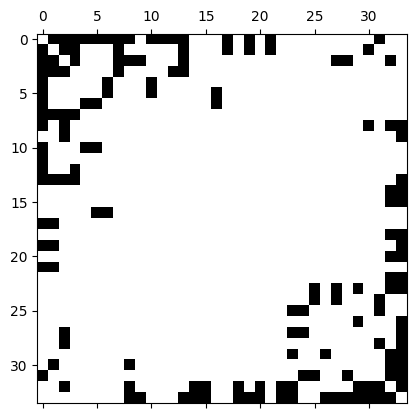

In [15]:
plt.spy(A)

In [36]:
rho0 = 1

x0 = np.zeros(n)
x0[list(random.sample(range(n), int(rho0 * n)))] = 1

gamma = 0.1
b = 0.04

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
simple_contagion = contagion_function(np.arange(n), b)

b = 0.2
contagion_function = lambda nu, b: b * (nu >= 2)
complex_contagion = contagion_function(np.arange(n), b)

x1 = contagion_process(A, gamma, simple_contagion, x0, tmin=0, tmax=1000, random_seed=None)
x2 = contagion_process(A, gamma, complex_contagion, x0, tmin=0, tmax=1000, random_seed=None)

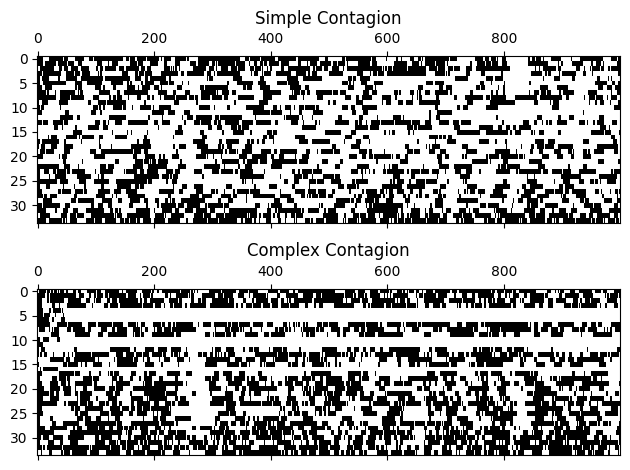

In [37]:
plt.figure()
plt.subplot(211)
plt.title("Simple Contagion")
plt.spy(x1.T, aspect="auto")
plt.subplot(212)
plt.title("Complex Contagion")
plt.spy(x2.T, aspect="auto")
plt.tight_layout()

In [38]:
p_c = np.ones((2, n))

p_rho = [1, 1]

rho0 = beta(p_rho[0], p_rho[1]).rvs()
print(rho0)

A0 = erdos_renyi(n, rho0)

samples1, l1 = infer_adjacency_matrix(
    x1, A0, p_rho, p_c, nsamples=100, burn_in=100000, skip=1500, return_likelihood=True
)

samples2, l2 = infer_adjacency_matrix(
    x1, A0, p_rho, p_c, nsamples=100, burn_in=100000, skip=1500, return_likelihood=True
)

0.9472803516594693
Acceptance ratio is 0.025183098591549297
Acceptance ratio is 0.02315492957746479


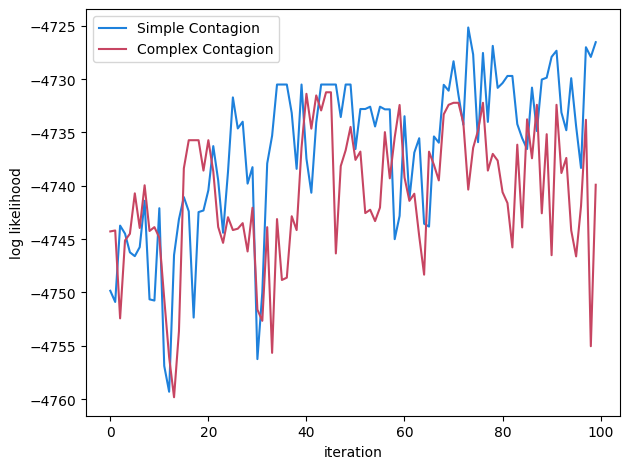

In [39]:
plt.figure()
plt.plot(l1, label="Simple Contagion")
plt.plot(l2, label="Complex Contagion")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("log likelihood")
plt.tight_layout()

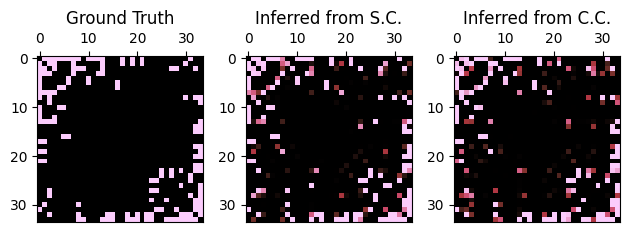

In [43]:
p1 = samples1.mean(axis=0)
p2 = samples2.mean(axis=0)
cmap = cmr.gem
plt.subplot(131)
plt.title("Ground Truth")
plt.imshow(A, cmap=fs.auroc_cmap, vmin=0, vmax=1)
plt.xticks([0, 10, 20, 30])
plt.yticks([0, 10, 20, 30])
ax = plt.gca()
ax.xaxis.tick_top()

plt.subplot(132)
plt.title("Inferred from S.C.")
plt.imshow(p1, cmap=fs.auroc_cmap, vmin=0, vmax=1)
plt.xticks([0, 10, 20, 30])
plt.yticks([0, 10, 20, 30])
ax = plt.gca()
ax.xaxis.tick_top()

plt.subplot(133)
plt.title("Inferred from C.C.")
plt.imshow(p2, cmap=fs.auroc_cmap, vmin=0, vmax=1)
plt.xticks([0, 10, 20, 30])
plt.yticks([0, 10, 20, 30])
ax = plt.gca()
ax.xaxis.tick_top()
plt.tight_layout()
plt.savefig("test.png", dpi=1000)

In [40]:
samplewise_posterior_similarity(samples1, A)

np.float64(0.6683902914121451)